### Importación de datos



In [225]:
import pandas as pd
# Importamos la libreria que nos sirve para hacer graficos.
from matplotlib import pyplot as plt
# Importamos la libreria Datetime que nos sirve para manipular fechas en su formato
import numpy as np
import folium as folium

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()
tienda2.head()
tienda3.head()
tienda4.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Lavavajillas,Electrodomésticos,"1,084,800.00","56,000.00",11/11/2022,Rafael Acosta,Bogotá,4,Tarjeta de crédito,3,4.61,-74.08
1,Cama box,Muebles,"473,800.00","25,400.00",03/01/2020,Izabela de León,Cúcuta,5,Tarjeta de crédito,2,7.89,-72.51
2,Balón de baloncesto,Deportes y diversión,"23,700.00",0.00,25/12/2022,Maria Alfonso,Medellín,5,Nequi,1,6.25,-75.56
3,Modelado predictivo,Libros,"57,700.00","1,300.00",23/11/2021,Lucas Olivera,Medellín,3,Nequi,1,6.25,-75.56
4,Auriculares,Electrónicos,"138,900.00","5,600.00",25/04/2022,Blanca Ramirez,Bogotá,4,Tarjeta de crédito,7,4.61,-74.08


In [ ]:
tienda['Tienda']='Tienda1'
tienda2['Tienda']='Tienda2'
tienda3['Tienda']='Tienda3'
tienda4['Tienda']='Tienda4'

#1. Análisis de facturación



In [ ]:
TotalTienda=pd.concat([tienda,tienda2,tienda3,tienda4])

In [ ]:
#función para contar productos por PRECIO y conviertiendolo a Df
def ingresos_precios(df, nombre_tienda):
    suma_tiendas = df['Precio'].sum()
    cantidad = len(df)
    return pd.DataFrame({'Tienda': [nombre_tienda], 'Cantidad' : [cantidad], 'Ingreso Total' : [suma_tiendas]})

#aplicar a la funcion por cada tienda
c1 = ingresos_precios(tienda, 'Tienda 1')
c2 = ingresos_precios(tienda2, 'Tienda 2')
c3 = ingresos_precios(tienda3, 'Tienda 3')
c4 = ingresos_precios(tienda4, 'Tienda 4')

#uniendo todo para gráficar
total_suma = pd.concat([c1, c2, c3, c4], ignore_index=True)
pd.options.display.float_format = '{:,.2f}'.format
total_suma

,Tienda,Cantidad,Ingreso Total
0,Tienda 1,2359,"1,150,880,400.00"
1,Tienda 2,2359,"1,116,343,500.00"
2,Tienda 3,2359,"1,098,019,600.00"
3,Tienda 4,2358,"1,038,375,700.00"


In [ ]:
# prompt: calcular el total del costo de envio por tienda

# Calcular el costo de envío total por tienda
def costo_envio_total(df, nombre_tienda):
    costo_envio = df['Costo de envío'].sum()
    return pd.DataFrame({'Tienda': [nombre_tienda], 'Costo de envío total': [costo_envio]})

envio1 = costo_envio_total(tienda, 'Tienda 1')
envio2 = costo_envio_total(tienda2, 'Tienda 2')
envio3 = costo_envio_total(tienda3, 'Tienda 3')
envio4 = costo_envio_total(tienda4, 'Tienda 4')

costo_envio_total = pd.concat([envio1, envio2, envio3, envio4], ignore_index=True)
pd.options.display.float_format = '{:,.2f}'.format
costo_envio_total


,Tienda,Costo de envío total
0,Tienda 1,"61,377,900.00"
1,Tienda 2,"59,485,100.00"
2,Tienda 3,"58,516,600.00"
3,Tienda 4,"55,317,400.00"


In [ ]:
# prompt: calcular la ganancia total por tienda restando el costo de envio total

# Fusionar los DataFrames de ingresos totales y costos de envío
ganancia_por_tienda = pd.merge(total_suma, costo_envio_total, on='Tienda')

# Calcular la ganancia neta por tienda
ganancia_por_tienda['Ganancia Neta'] = ganancia_por_tienda['Ingreso Total'] - ganancia_por_tienda['Costo de envío total']

# Mostrar el resultado
pd.options.display.float_format = '{:,.2f}'.format
ganancia_por_tienda


,Tienda,Cantidad,Ingreso Total,Costo de envío total,Ganancia Neta
0,Tienda 1,2359,"1,150,880,400.00","61,377,900.00","1,089,502,500.00"
1,Tienda 2,2359,"1,116,343,500.00","59,485,100.00","1,056,858,400.00"
2,Tienda 3,2359,"1,098,019,600.00","58,516,600.00","1,039,503,000.00"
3,Tienda 4,2358,"1,038,375,700.00","55,317,400.00","983,058,300.00"


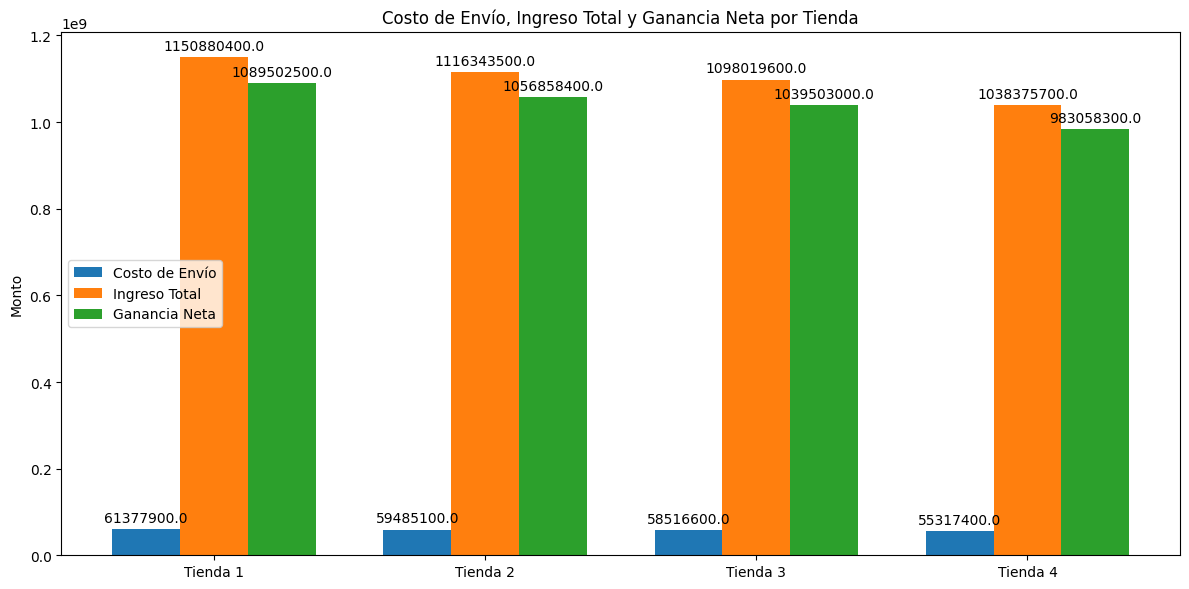

In [ ]:
# prompt: Grafico por tienda, en donde se represente el costo de envio, el precio y la ganancia total

import matplotlib.pyplot as plt

# Datos para el gráfico (obtenidos de ganancia_por_tienda)
tiendas = ganancia_por_tienda['Tienda']
costos_envio = ganancia_por_tienda['Costo de envío total']
ingresos_totales = ganancia_por_tienda['Ingreso Total']
ganancias_netas = ganancia_por_tienda['Ganancia Neta']

x = np.arange(len(tiendas))  # Posiciones de las barras en el eje x
width = 0.25  # Ancho de las barras

fig, ax = plt.subplots(figsize=(12, 6))

rects1 = ax.bar(x - width, costos_envio, width, label='Costo de Envío')
rects2 = ax.bar(x, ingresos_totales, width, label='Ingreso Total')
rects3 = ax.bar(x + width, ganancias_netas, width, label='Ganancia Neta')

# Agregar etiquetas y título
ax.set_ylabel('Monto')
ax.set_title('Costo de Envío, Ingreso Total y Ganancia Neta por Tienda')
ax.set_xticks(x)
ax.set_xticklabels(tiendas)
ax.legend()

# Agregar etiquetas de valor encima de cada barra
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()


# 2. Ventas por categoría

In [ ]:
# Función para calcular las ventas por categoría de producto
def conteo_categoria(df, nombre_tienda):
    conteo = df.groupby('Categoría del Producto').size().reset_index(name ='Cantidad')
    conteo['Tienda'] = nombre_tienda
    return conteo

tienda1 = conteo_categoria(tienda, 'Tienda 1')
tienda2 = conteo_categoria(tienda2, 'Tienda 2')
tienda3 = conteo_categoria(tienda3, 'Tienda 3')
tienda4 = conteo_categoria(tienda4, 'Tienda 4')

#uniendo todo para gráficar
total = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)
total

,Categoría del Producto,Cantidad,Tienda
0,Artículos para el hogar,171,Tienda 1
1,Deportes y diversión,284,Tienda 1
2,Electrodomésticos,312,Tienda 1
3,Electrónicos,448,Tienda 1
4,Instrumentos musicales,182,Tienda 1
5,Juguetes,324,Tienda 1
6,Libros,173,Tienda 1
7,Muebles,465,Tienda 1
8,Artículos para el hogar,181,Tienda 2
9,Deportes y diversión,275,Tienda 2


In [ ]:
# prompt: Mostrar una tabla con las tres categorias mas vendida por tienda

# Agrupar por tienda y categoría, luego ordenar por cantidad y obtener las 3 principales
top_categories = total.groupby('Tienda').apply(lambda x: x.nlargest(3, 'Cantidad')).reset_index(drop=True)

# Mostrar la tabla
top_categories


<ipython-input-198-061d1f93d0c8>:4: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,Categoría del Producto,Cantidad,Tienda
0,Muebles,465,Tienda 1
1,Electrónicos,448,Tienda 1
2,Juguetes,324,Tienda 1
3,Muebles,442,Tienda 2
4,Electrónicos,422,Tienda 2
5,Juguetes,313,Tienda 2
6,Muebles,499,Tienda 3
7,Electrónicos,451,Tienda 3
8,Juguetes,315,Tienda 3
9,Muebles,480,Tienda 4


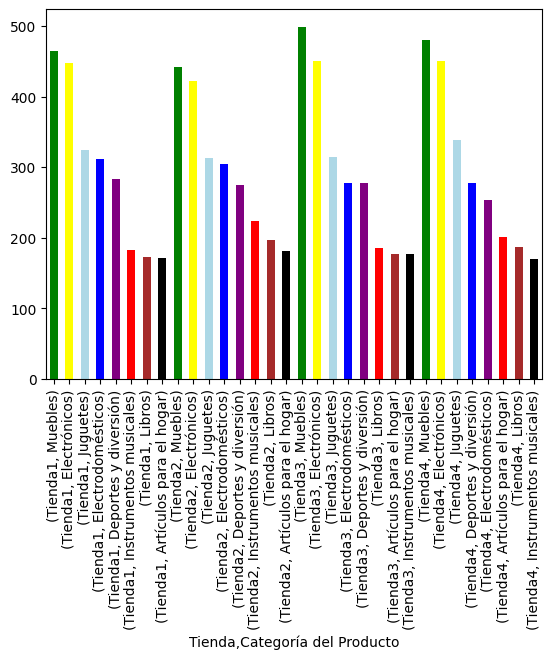

In [ ]:
color=['green','yellow','lightblue', 'blue', 'purple', 'red', 'brown','black']
graf=VentasTotal.plot.bar(color=color)

#print(VentasTotal['Tienda'])

# 3. Calificación promedio de la tienda


In [ ]:
# prompt: Obtener el promedio de la calificacion de cada una de las tiendas

# Concatenar los DataFrames de calificaciones promedio
calificaciones_promedio = pd.concat([calif1, calif2, calif3, calif4], ignore_index=True)

# Mostrar el resultado
pd.options.display.float_format = '{:,.2f}'.format
calificaciones_promedio


,Tienda,Calificación-Prom,Calificación Promedio
0,Tienda 1,3.98,NaN
1,Tienda 2,NaN,4.04
2,Tienda 3,NaN,4.05
3,Tienda 4,NaN,4.00


In [ ]:
# prompt: Con DataFrame calificacion_promedio_tiendas: crear un grafico de barras

import altair as alt

# Create a bar chart
chart = alt.Chart(calificacion_promedio_tiendas).mark_bar().encode(
    x='Tienda',  # X-axis represents the store names
    y='Calificación Promedio'  # Y-axis represents the average rating
)

# Display the chart
chart


alt.Chart(...)

# 4. Productos más y menos vendidos

In [230]:
#función para contabilizar productos
def productos_tienda(df, nombre_tienda):
    conteo_productos = df['Producto'].value_counts()
    mas_vendido = conteo_productos.idxmax()
    menos_vendido = conteo_productos.idxmin()
    return pd.DataFrame({'Tienda' : [nombre_tienda], 'Producto más vendido' : [mas_vendido], 'Producto menos vendido' : [menos_vendido]})

#Aplicar a la funcion por cada tienda
m1 = productos_tienda(tienda, 'Tienda 1')
m2 = productos_tienda(tienda2, 'Tienda 2')
m3 = productos_tienda(tienda3, 'Tienda 3')
m4 = productos_tienda(tienda4, 'Tienda 4')

#Concatenación
productos_mas_menos_vendidos = pd.concat([m1, m2, m3, m4], ignore_index=True)
productos_mas_menos_vendidos

,Tienda,Producto más vendido,Producto menos vendido
0,Tienda 1,Microondas,Auriculares con micrófono
1,Tienda 2,Iniciando en programación,Juego de mesa
2,Tienda 3,Kit de bancas,Bloques de construcción
3,Tienda 4,Cama box,Guitarra eléctrica


# 5. Envío promedio por tienda

In [231]:
#función para calcular promedio del envío de cada tienda
def promedio_tienda_envio(df, nombre_tienda):
    contador_envio = len(df)
    suma_promedio_envio = df['Costo de envío'].sum()/contador_envio
    return pd.DataFrame({'Tienda': [nombre_tienda], 'Conteo' : [contador_envio], 'Promedio' : [suma_promedio_envio]})

e1 = promedio_tienda_envio(tienda, 'Tienda 1')
e2 = promedio_tienda_envio(tienda2, 'Tienda 2')
e3 = promedio_tienda_envio(tienda3, 'Tienda 3')
e4 = promedio_tienda_envio(tienda4, 'Tienda 4')

#concatenación
promedio_envios = pd.concat([e1, e2, e3, e4], ignore_index=True)
promedio_envios


,Tienda,Conteo,Promedio
0,Tienda 1,2359,"26,018.61"
1,Tienda 2,2359,"25,216.24"
2,Tienda 3,2359,"24,805.68"
3,Tienda 4,2358,"23,459.46"


6. LATITUD Y LONGITUD

In [232]:
# prompt: Utilice los datos de latitud (lat) y longitud (lon) para mapear las ventas de cada tienda y analizar la distribución geográfica de los productos vendidos en un heatmaps.

import pandas as pd
import folium
from folium.plugins import HeatMap

# Assuming 'tienda', 'tienda2', 'tienda3', and 'tienda4' DataFrames are already loaded as in your provided code.

# Concatenate all DataFrames into a single DataFrame
all_stores = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Create a map centered around the mean latitude and longitude
map_center = [all_stores['lat'].mean(), all_stores['lon'].mean()]
map_stores = folium.Map(location=map_center, zoom_start=6) # Adjust zoom_start as needed

# Prepare the data for the heatmap
heat_data = all_stores[['lat', 'lon', 'Precio']].values.tolist()  # Using 'Precio' as the intensity

# Add the heatmap to the map
HeatMap(heat_data, radius=15, blur=10).add_to(map_stores) # Adjust radius and blur as needed

# Display the map
map_stores


# CONCLUSION

De acuerdo a lo analizado, la tienda 4 es la que menos vende, y aunque en calificacion esta muy cercana a las otras tiendas, si es necesario cerrar una de ellas, seria esta.